In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import csv

path = "/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Electronics_v1_00.tsv"
with open(path, 'r', encoding='utf-8', errors='ignore') as file:
    reader = csv.reader(file, delimiter='\t', quoting=csv.QUOTE_NONE)
    rows = [row for row in reader]

    df = pd.DataFrame(rows[1:], columns=rows[0])

In [3]:
df


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093864,US,51216847,RZ3LLAKIZQ3RR,B00000JBAT,738692522,Diamond Rio Digital Player,Electronics,5,0,0,N,N,Next Millenium Consumer Electronics,"Diamond's RIO is the current, silicon-state ni...",1999-06-14
3093865,US,52953714,R1V8GVI67B7V0K,B00000JBAT,738692522,Diamond Rio Digital Player,Electronics,5,0,0,N,N,WOW! THE BEST THING TO HAPPEN TO MUSIC!,The RIO rocks! It is so great that Diamond Mul...,1999-06-13
3093866,US,51764094,R3BDESK5VUNK8C,B00000J4FY,503765214,JVC RVB90 Urban Assault Kaboom (Green),Electronics,5,5,5,N,N,The most powerful boombox ever made.,I have listened to practically every boombox a...,1999-06-12
3093867,US,52011360,R1JJGM0JWVT7DV,B00000JHWN,662358399,Sony DE441 Discman,Electronics,5,3,3,N,N,very nice,compared to my old discman this one is really ...,1999-06-12


In [4]:
df['product_category'].value_counts()

product_category
Electronics    3093869
Name: count, dtype: int64

In [5]:
features = df[['review_headline', 'review_body']].iloc[:300000]
target = df[['verified_purchase']].iloc[:300000]

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target['verified_purchase'] = label_encoder.fit_transform(target['verified_purchase'])

In [7]:
features

,review_headline,review_body
0,Five Stars,As described.
1,It works as advertising.,It works as advertising.
2,Five Stars,Works pissa
3,One Star,Did not work at all.
4,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...
...,...,...
299995,Five Stars,It Works.
299996,Five Stars,works just as expected
299997,Works beautifully! Additionally it is a lovely...,Works beautifully! Additionally it is a lovel...
299998,Pretty damn nice sound out of this little box,Pretty damn nice sound out of this little box....


In [8]:
target

,verified_purchase
0,1
1,1
2,1
3,1
4,1
...,...
299995,1
299996,1
299997,1
299998,1


<Axes: xlabel='verified_purchase', ylabel='count'>

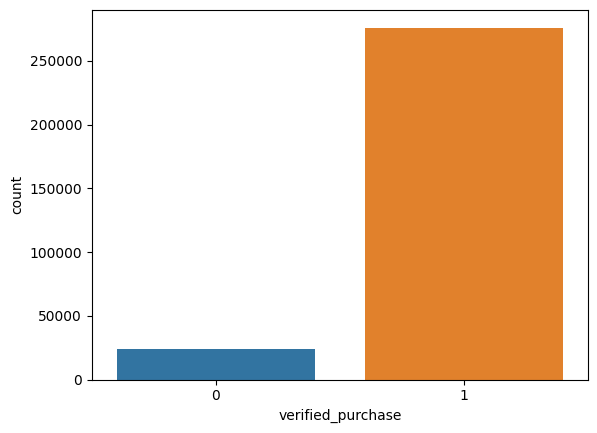

In [9]:
sns.countplot(x='verified_purchase', data = target)

In [10]:
from sklearn.model_selection import train_test_split
features['combined_text'] = features['review_headline'] + ' ' + features['review_body']
train_texts, test_texts, train_labels, test_labels = train_test_split(
    features['combined_text'].values,
    target['verified_purchase'].values,
    test_size=0.3,
    random_state=42
)

In [11]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # 2 for binary classification


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifier.bias', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
from torch.utils.data import DataLoader, TensorDataset
import torch
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, return_tensors='pt')

In [13]:
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)

train_dataset = TensorDataset(train_encodings['input_ids'],
                              train_encodings['attention_mask'],
                              torch.tensor(train_labels))

test_dataset = TensorDataset(test_encodings['input_ids'],
                             test_encodings['attention_mask'],
                             torch.tensor(test_labels))

In [14]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
import torch
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = CrossEntropyLoss()

In [16]:
num_epochs = 3

accumulation_steps = 4  
for epoch in range(num_epochs):
    print("epoch = ", epoch)
    model.train()
    for i, batch in enumerate(train_loader):
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        
        if (i + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

epoch =  0
epoch =  1
epoch =  2


In [17]:
model.eval()
all_preds = []
all_labels = []

for batch in test_loader:
    input_ids, attention_mask, labels = [t.to(device) for t in batch]
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

In [18]:
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.69      0.24      0.35      7061
           1       0.94      0.99      0.96     82939

    accuracy                           0.93     90000
   macro avg       0.81      0.61      0.66     90000
weighted avg       0.92      0.93      0.92     90000



In [19]:
torch.save(model.state_dict(), 'fake_review_detector_model.pth')
